In [173]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotting import plot_octagon, plot_trajectory
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import plotting.plot_counts_seen_vs_chosen as plot_counts_seen_vs_chosen
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
drop_p_choose_high = True
drop_box_plot = False
drop_given_wall_condition = False
drop_scatter_plot = True


### Plot the probability of choosing High across solo and social conditions
Drop points if there are too few trials after filtering the trials list and dropping initial trials

In [133]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [134]:
if not drop_p_choose_high:
    _, trial_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_all_solo, combine=False)

In [135]:
_, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)
trial_lists_social = trial_lists_social

filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15

In [136]:
# get the probability of choosing the wall for solo and social sessions, with cut_solo_trials trials dropped from the start of the first solo session
if not drop_p_choose_high:
    (probability_choose_high_social_array,
    probability_choose_high_solo_array,
    probability_choose_high_solo_array_first_session,
    probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trial_lists_solo,
                                                                                                                                            trial_lists_social,
                                                                                                                                            wall_sep=4,
                                                                                                                                            trial_type=globals.HIGH_LOW,
                                                                                                                                            cut_solo_trials=5)  

In [137]:
if not drop_p_choose_high:

    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

In [138]:
if not drop_p_choose_high:
    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [139]:
if not drop_p_choose_high:

    trial_lists_filtered = []
    for trial_list in trial_lists_solo:

        trial_list = trial_list[5:]
        
        a = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
        trial_list = [trial_list[i] for i in a]

        b = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=4)
        trial_list = [trial_list[i] for i in b]

        print(len(trial_list))
        trial_lists_filtered.append(trial_list)




    print(f"Sum: {sum(1 for trial_list in trial_lists_filtered if len(trial_list) <= 4)}")
    print(f"Total sum: {len(trial_lists_filtered)}")


### Plot the probability of choosing the low wall across different conditions
Inferred losers choice seems to be slow mainly because of get_wall_visible (20-30 ms seconds for each trial for each player)

The main function called in probability_first_wall_chosen_and_low_multiple_sessions_df, first_visible_wall_chosen_session, accounts for basically all of the time in this cell

Within first_visible_wall_chosen_session, it seems to only be get_wall_visible that takes up time on each trial loop 

The main function for inferring losers choice seems to only take about 200 ms per player per session

NB: This means it is not loser's inferred choice but identifying wall visibility (first wall vis, etc.) that is taking time

In [ ]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    times_first_wall_chosen_when_low_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists_social[:12], wall_sep=None, inferred_choice=False, debug=False)
  (probability_first_wall_chosen_when_high_array,
    times_first_wall_chosen_when_high_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists_social[:12], wall_sep=None, inferred_choice=False, reverse=True, debug=False)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


In [ ]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    times_first_wall_chosen_when_low_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_combined_solo(trial_lists_solo, wall_sep=None, debug=False)
  (probability_first_wall_chosen_when_high_array,
    times_first_wall_chosen_when_high_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_combined_solo(trial_lists_solo, wall_sep=None, reverse=True, debug=False)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']

In [142]:
if not drop_box_plot:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose first wall seen)")

Histogram of trial number counts for the current condition, across players

In [143]:
if not drop_box_plot:
    data = times_first_wall_chosen_when_low_array.ravel()
    plt.hist(data, bins=range(0,25,2), edgecolor='black')
    plt.ylim([0, 12])
    plt.title("Choose first visible when Low, include inferred choice, 180 degree wall separations")
    plt.xlabel("Number of trials per player")
    plt.ylabel("Frequency")

    # Remove the top and right spines
    ax = plt.gca()  # Get the current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [144]:
if not drop_box_plot:    
    data = times_first_wall_chosen_when_high_array.ravel()
    plt.hist(data, bins=range(0,25,2), edgecolor='black')
    plt.ylim([0, 12])
    plt.title("Choose first visible when High, include inferred choice, 180 degree separations")
    plt.xlabel("Number of trials per player")
    plt.ylabel("Frequency")

    # Remove the top and right spines
    ax = plt.gca()  # Get the current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [ ]:
if not drop_box_plot:
    data = {
        'Condition' : times_high_wall_first_seen_and_choice_data.ravel(),
        'Chosen' : times_high_wall_first_seen_and_chosen.ravel()
    }

    plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times high wall seen first and chosen across individuals', define_ylim=(0,45))

### Plot P(choose High) for conditions of High first visible and High second visible
- Also includes stacked bar plots of "num condition fulfilled and choice data avaiable" alongide "condition fulfilled and chose given wall"

In [281]:
%%capture
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_first_seen,
    times_high_wall_first_seen,
    times_high_wall_first_seen_and_choice_data,
    times_high_wall_first_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions(trial_lists_social[:12], given_wall_first_vis=True,
                                                                                                                                  given_wall_index=1, wall_sep=4, 
                                                                                                                                current_fov=110,
                                                                                                                                inferred_choice=False, debug=False)

In [ ]:
%%capture
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_second_seen,
    times_high_wall_second_seen,
    times_high_wall_second_seen_and_choice_data,
    times_high_wall_second_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions(trial_lists_social[:12], given_wall_first_vis=False,
                                                                                                                                  given_wall_index=0, wall_sep=None, 
                                                                                                                                current_fov=110,
                                                                                                                                inferred_choice=False, debug=False)

In [ ]:
if not drop_given_wall_condition: 
    wall_choice_probabilities = [probability_high_wall_chosen_when_first_seen, probability_high_wall_chosen_when_second_seen] 
    wall_choice_labels = ['High first visible', 'High second visible']

In [ ]:
if not drop_given_wall_condition: 
    probability_first_wall_chosen_when_high_array

In [ ]:
probability_high_wall_chosen_when_second_seen, times_high_wall_second_seen, times_high_wall_second_seen_and_chosen

(array([[0.41666667, 0.63636364],
        [0.33333333, 0.72222222],
        [0.4       , 0.4       ],
        [0.5       , 0.65217391],
        [0.5       , 0.71428571],
        [0.76470588, 0.3       ],
        [0.45454545, 0.70833333],
        [0.4375    , 0.56521739],
        [0.5       , 0.26315789],
        [0.7037037 ,        nan],
        [0.        , 0.8372093 ],
        [0.25      , 0.84615385]]),
 array([[15., 13.],
        [ 5., 18.],
        [20., 13.],
        [25., 26.],
        [ 7., 14.],
        [17., 10.],
        [28., 24.],
        [22., 24.],
        [ 9., 21.],
        [30.,  1.],
        [18., 44.],
        [13., 28.]]),
 array([[12., 11.],
        [ 3., 18.],
        [15., 10.],
        [16., 23.],
        [ 4.,  7.],
        [17., 10.],
        [22., 24.],
        [16., 23.],
        [ 6., 19.],
        [27.,  0.],
        [14., 43.],
        [ 8., 26.]]))

In [168]:
if not drop_given_wall_condition: 
    probability_high_wall_chosen_when_second_seen, times_high_wall_second_seen, times_high_wall_second_seen_and_chosen

In [ ]:
if not drop_given_wall_condition: 
    probability_high_wall_chosen_when_first_seen, times_high_wall_first_seen, times_high_wall_first_seen_and_chosen

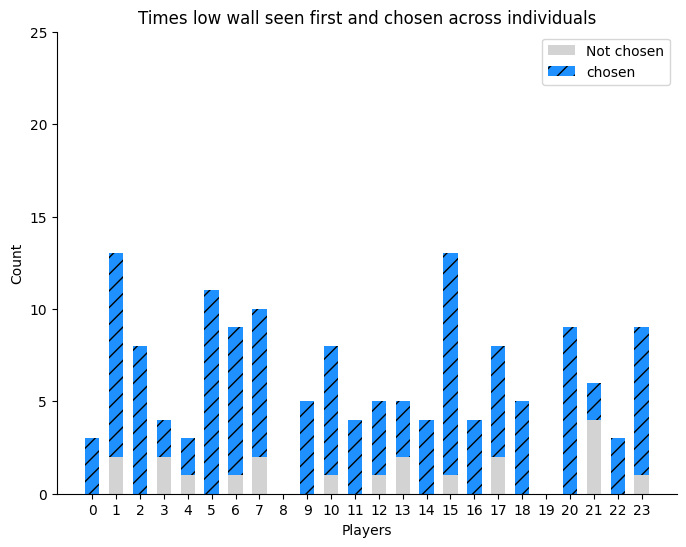

In [282]:
if not drop_given_wall_condition:
    data = {
        'Condition' : times_high_wall_first_seen_and_choice_data.ravel(),
        'Chosen' : times_high_wall_first_seen_and_chosen.ravel()
    }

    plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times low wall seen first and chosen across individuals', define_ylim=(0,25))

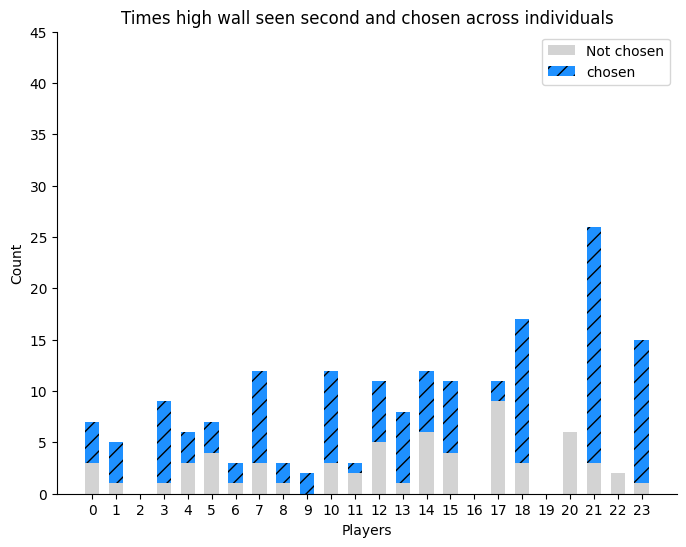

In [257]:
if not drop_given_wall_condition:
    data = {
        'Condition' : times_high_wall_second_seen_and_choice_data.ravel(),
        'Chosen' : times_high_wall_second_seen_and_chosen.ravel()
    }

    plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times high wall seen second and chosen across individuals', define_ylim=(0,45))

c:\users\tomha\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


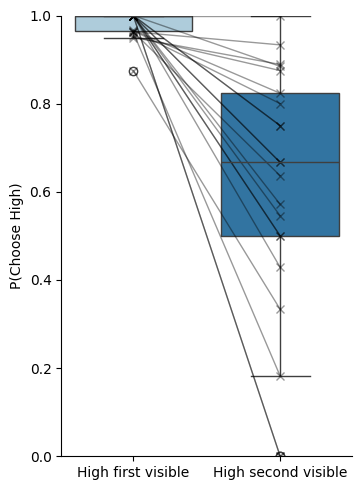

In [250]:
if not drop_given_wall_condition:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose High)")


### Plot performance against probability of choosing Low when Low first visibile 

In [152]:
trial_lists_social_drop_5 = [trial_list for i,trial_list in enumerate(trial_lists_social) if i != 5]

trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 8.0
 this_player_this_tria

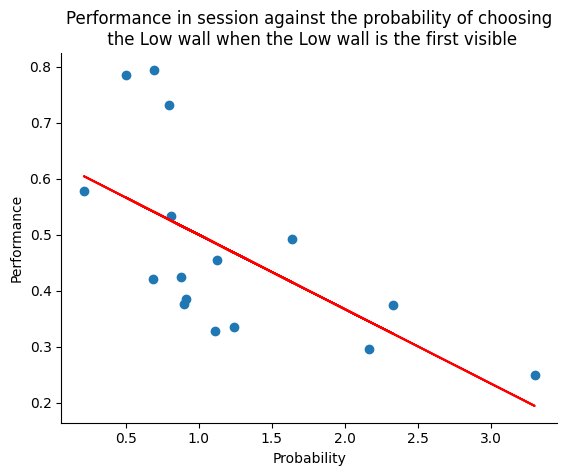

In [160]:
if not drop_scatter_plot:
    plot_probability_chose_wall.plot_performance_against_probability_low_when_first_visible_df(trial_lists_social, inferred_choice=False, correlation_line=True, print_correlation=True)